# Process Data

This notebook process the input data.

Reference:  https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/

It will be converted to python code to be shared with various models

In [1]:
# Pretty display for notebooks
%matplotlib inline

import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from time import time
#import cPickle
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
#import visuals as vs
import xlsxwriter

## Load the data from csv file
for now, you have to manualy unzip the file on your computer before running the following code

In [2]:

df_orig = pd.read_csv('./data/ny_hmda_2015.csv', low_memory=False, header=0, delimiter=",")



## Inspect the data

In [3]:
# group dataframe by unique combination of columns, and return a dataframe with count as the added last column
# df: the dataframe that contains all columns
# 
def get_count_of_unique_columns(df, list_of_columns):
    df_temp = df[list_of_columns]  #select the columns of list_of_columns
    df_count = df_temp.dropna().groupby(list_of_columns, as_index=False).size().reset_index().rename(columns={0:'count'})
    return df_count

In [4]:
# Make a copy of original dataframe so that the original is not altered when manipulate the df
df = df_orig.copy()

# to inspect the dada
print ("dataframe head:")
#print(df.head())
display(df.head(n=2))

num_rows = df.shape[0]
num_col = df.shape[1]
print ("Total number of records: {}".format(num_rows))
print ("Toatl numver of features: {}".format(num_col))

print("Display all columns and 3 rows")
display(df.loc[0:2, 'action_taken':'applicant_income_000s'])
display(df.loc[0:2, 'applicant_race_1':'applicant_race_name_5'])
display(df.loc[0:2, 'applicant_sex':'co_applicant_race_name_5'])
display(df.loc[0:2, 'co_applicant_sex':'edit_status_name'])
display(df.loc[0:2, 'hoepa_status':'msamd_name'])
               
display(df.loc[0:2, 'owner_occupancy':'state_name'])
display(df.loc[0:2, 'hud_median_family_income':'tract_to_msamd_income'])



dataframe head:


,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s,applicant_race_1,applicant_race_2,...,state_abbr,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
0,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,97.0,5,NaN,...,NY,New York,109000.0,187,363.0,1817.0,21.139999,5870.0,NaN,109.459999
1,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,200.0,5,NaN,...,NY,New York,71300.0,460,53.0,256.0,45.959999,3512.0,NaN,160.600006


Total number of records: 439654
Toatl numver of features: 78
Display all columns and 3 rows


,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s
0,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,97.0
1,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,200.0
2,1,Loan originated,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,NaN


,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,applicant_race_name_1,applicant_race_name_2,applicant_race_name_3,applicant_race_name_4,applicant_race_name_5
0,5,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN
1,5,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,Black or African American,NaN,NaN,NaN,NaN


,applicant_sex,applicant_sex_name,application_date_indicator,as_of_year,census_tract_number,co_applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,co_applicant_race_name_1,co_applicant_race_name_2,co_applicant_race_name_3,co_applicant_race_name_4,co_applicant_race_name_5
0,2,Female,0,2015,3007.0,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
1,1,Male,0,2015,111.0,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
2,1,Male,0,2015,105.0,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN


,co_applicant_sex,co_applicant_sex_name,county_code,county_name,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,edit_status,edit_status_name
0,5,No co-applicant,59.0,Nassau County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,No co-applicant,61.0,New York County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only
2,5,No co-applicant,71.0,Orange County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only


,hoepa_status,hoepa_status_name,lien_status,lien_status_name,loan_purpose,loan_purpose_name,loan_type,loan_type_name,msamd,msamd_name
0,2,Not a HOEPA loan,1,Secured by a first lien,1,Home purchase,1,Conventional,35004.0,"Nassau County, Suffolk County - NY"
1,2,Not a HOEPA loan,1,Secured by a first lien,1,Home purchase,1,Conventional,35614.0,"New York, Jersey City, White Plains - NY, NJ"
2,2,Not a HOEPA loan,1,Secured by a first lien,3,Refinancing,1,Conventional,35614.0,"New York, Jersey City, White Plains - NY, NJ"


,owner_occupancy,owner_occupancy_name,preapproval,preapproval_name,property_type,property_type_name,purchaser_type,purchaser_type_name,respondent_id,sequence_number,state_code,state_abbr,state_name
0,1,Owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,0,Loan was not originated or was not sold in cal...,0000451965,164811,36,NY,New York
1,1,Owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,6,"Commercial bank, savings bank or savings assoc...",0002735146,26589,36,NY,New York
2,1,Owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,3,Freddie Mac (FHLMC),75-2921540,141383,36,NY,New York


,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
0,109000.0,187,363.0,1817.0,21.139999,5870.0,NaN,109.459999
1,71300.0,460,53.0,256.0,45.959999,3512.0,NaN,160.600006
2,71300.0,296,2745.0,2586.0,38.990002,8357.0,NaN,134.820007


## Inspect Missing Data in Columns with Continous Value


In [5]:
scale_column_indexer = ('applicant_income_000s', 'hud_median_family_income', 'loan_amount_000s','number_of_1_to_4_family_units',
                'number_of_owner_occupied_units','minority_population','population','tract_to_msamd_income')

#select rows whose scale_column contains missing data
print("rows whose columns of continuous value contain missing data")
df_missing = df[df.loc[:, scale_column_indexer].isnull().any(axis=1)]
display(df_missing.shape)
#display(df_missing)

display(df_missing.loc[:, 'action_taken':'applicant_income_000s'])
display(df_missing.loc[:, 'applicant_race_1':'applicant_race_name_5'])
display(df_missing.loc[:, 'applicant_sex':'co_applicant_race_name_5'])
display(df_missing.loc[:, 'co_applicant_sex':'edit_status_name'])
display(df_missing.loc[:, 'hoepa_status':'msamd_name'])
               
display(df_missing.loc[:, 'owner_occupancy':'state_name'])
display(df_missing.loc[:, 'hud_median_family_income':'tract_to_msamd_income'])


rows whose columns of continuous value contain missing data


(63138, 78)

,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s
2,1,Loan originated,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,NaN
14,1,Loan originated,7,HUD,Department of Housing and Urban Development,3,"Information not provided by applicant in mail,...",NaN
34,1,Loan originated,1,OCC,Office of the Comptroller of the Currency,2,Not Hispanic or Latino,NaN
42,1,Loan originated,7,HUD,Department of Housing and Urban Development,3,"Information not provided by applicant in mail,...",NaN
47,1,Loan originated,7,HUD,Department of Housing and Urban Development,3,"Information not provided by applicant in mail,...",NaN
64,1,Loan originated,7,HUD,Department of Housing and Urban Development,1,Hispanic or Latino,NaN
67,1,Loan originated,7,HUD,Department of Housing and Urban Development,3,"Information not provided by applicant in mail,...",NaN
69,1,Loan originated,7,HUD,Department of Housing and Urban Development,3,"Information not provided by applicant in mail,...",NaN
72,1,Loan originated,7,HUD,Department of Housing and Urban Development,3,"Information not provided by applicant in mail,...",NaN
74,1,Loan originated,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,NaN


,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,applicant_race_name_1,applicant_race_name_2,applicant_race_name_3,applicant_race_name_4,applicant_race_name_5
2,3,NaN,NaN,NaN,NaN,Black or African American,NaN,NaN,NaN,NaN
14,6,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN
34,5,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN
42,6,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN
47,6,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN
64,5,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN
67,6,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN
69,6,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN
72,6,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN
74,2,NaN,NaN,NaN,NaN,Asian,NaN,NaN,NaN,NaN


,applicant_sex,applicant_sex_name,application_date_indicator,as_of_year,census_tract_number,co_applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,co_applicant_race_name_1,co_applicant_race_name_2,co_applicant_race_name_3,co_applicant_race_name_4,co_applicant_race_name_5
2,1,Male,0,2015,105.00,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
14,3,"Information not provided by applicant in mail,...",0,2015,413.00,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
34,2,Female,0,2015,9614.00,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
42,3,"Information not provided by applicant in mail,...",0,2015,273.00,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
47,3,"Information not provided by applicant in mail,...",0,2015,1456.05,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
64,1,Male,0,2015,361.00,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
67,3,"Information not provided by applicant in mail,...",0,2015,3018.00,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
69,3,"Information not provided by applicant in mail,...",0,2015,563.00,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
72,3,"Information not provided by applicant in mail,...",0,2015,4140.01,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN
74,2,Female,0,2015,177.00,5,No co-applicant,8,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN


,co_applicant_sex,co_applicant_sex_name,county_code,county_name,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,edit_status,edit_status_name
2,5,No co-applicant,71.0,Orange County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only
14,5,No co-applicant,47.0,Kings County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only
34,5,No co-applicant,31.0,Essex County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only
42,5,No co-applicant,47.0,Kings County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,5,No co-applicant,103.0,Suffolk County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only
64,5,No co-applicant,5.0,Bronx County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only
67,5,No co-applicant,59.0,Nassau County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only
69,5,No co-applicant,47.0,Kings County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only
72,5,No co-applicant,59.0,Nassau County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only
74,5,No co-applicant,61.0,New York County,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Quality edit failure only


,hoepa_status,hoepa_status_name,lien_status,lien_status_name,loan_purpose,loan_purpose_name,loan_type,loan_type_name,msamd,msamd_name
2,2,Not a HOEPA loan,1,Secured by a first lien,3,Refinancing,1,Conventional,35614.0,"New York, Jersey City, White Plains - NY, NJ"
14,2,Not a HOEPA loan,1,Secured by a first lien,3,Refinancing,1,Conventional,35614.0,"New York, Jersey City, White Plains - NY, NJ"
34,2,Not a HOEPA loan,3,Not secured by a lien,2,Home improvement,1,Conventional,NaN,NaN
42,2,Not a HOEPA loan,1,Secured by a first lien,3,Refinancing,1,Conventional,35614.0,"New York, Jersey City, White Plains - NY, NJ"
47,2,Not a HOEPA loan,1,Secured by a first lien,3,Refinancing,1,Conventional,35004.0,"Nassau County, Suffolk County - NY"
64,2,Not a HOEPA loan,1,Secured by a first lien,1,Home purchase,1,Conventional,35614.0,"New York, Jersey City, White Plains - NY, NJ"
67,2,Not a HOEPA loan,1,Secured by a first lien,3,Refinancing,1,Conventional,35004.0,"Nassau County, Suffolk County - NY"
69,2,Not a HOEPA loan,1,Secured by a first lien,3,Refinancing,1,Conventional,35614.0,"New York, Jersey City, White Plains - NY, NJ"
72,2,Not a HOEPA loan,1,Secured by a first lien,1,Home purchase,1,Conventional,35004.0,"Nassau County, Suffolk County - NY"
74,2,Not a HOEPA loan,1,Secured by a first lien,1,Home purchase,1,Conventional,35614.0,"New York, Jersey City, White Plains - NY, NJ"


,owner_occupancy,owner_occupancy_name,preapproval,preapproval_name,property_type,property_type_name,purchaser_type,purchaser_type_name,respondent_id,sequence_number,state_code,state_abbr,state_name
2,1,Owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,3,Freddie Mac (FHLMC),75-2921540,141383,36,NY,New York
14,2,Not owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,9,Other type of purchaser,20-1193192,1825,36,NY,New York
34,1,Owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,0,Loan was not originated or was not sold in cal...,0000007699,270,36,NY,New York
42,2,Not owner-occupied as a principal dwelling,3,Not applicable,3,Multifamily dwelling,9,Other type of purchaser,20-1193192,2173,36,NY,New York
47,2,Not owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,9,Other type of purchaser,20-1193192,2181,36,NY,New York
64,2,Not owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,9,Other type of purchaser,20-1193192,1893,36,NY,New York
67,2,Not owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,9,Other type of purchaser,20-1193192,2336,36,NY,New York
69,2,Not owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,9,Other type of purchaser,20-1193192,1900,36,NY,New York
72,2,Not owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,9,Other type of purchaser,20-1193192,2351,36,NY,New York
74,2,Not owner-occupied as a principal dwelling,3,Not applicable,1,One-to-four family dwelling (other than manufa...,9,Other type of purchaser,20-1193192,2029,36,NY,New York


,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
2,71300.0,296,2745.0,2586.0,38.990002,8357.0,NaN,134.820007
14,71300.0,560,948.0,251.0,98.190002,3822.0,4.63,69.650002
34,60000.0,8,1671.0,527.0,3.370000,1485.0,NaN,107.320000
42,71300.0,1200,964.0,386.0,95.489998,2813.0,4.52,83.320000
47,109000.0,217,712.0,601.0,83.470001,3690.0,6.01,81.980003
64,71300.0,168,133.0,60.0,99.250000,6019.0,5.63,27.830000
67,109000.0,476,1579.0,1050.0,40.189999,5073.0,4.97,110.169998
69,71300.0,334,720.0,242.0,40.830002,4360.0,5.63,80.360001
72,109000.0,163,1151.0,854.0,98.730003,4004.0,5.44,70.510002
74,71300.0,699,462.0,1357.0,49.020000,9151.0,4.63,121.970001


## Get Count of Unique Columns (may be used as lookup table)
It can also be used as a lookup table after delete the xx_name columns

In [6]:

df_action_count = get_count_of_unique_columns(df, ['action_taken','action_taken_name'])
print("df_action_count")
display(df_action_count)

df_ethnic_count = get_count_of_unique_columns(df, ['applicant_ethnicity', 'applicant_ethnicity_name'])
print("df_ethnic_count")
display(df_ethnic_count)

df_race_count = get_count_of_unique_columns(df, ['applicant_race_1', 'applicant_race_name_1'])
print("df_race_count")
display(df_race_count)


df_gender_count = get_count_of_unique_columns(df, ['applicant_sex', 'applicant_sex_name'])
print("df_gender_count")
display(df_gender_count)


df_agency_count = get_count_of_unique_columns(df, ['agency_code', 'agency_abbr', 'agency_name'])
print("df_agency_count")
display(df_agency_count)

df_count = get_count_of_unique_columns(df, ['hoepa_status', 'hoepa_status_name'])
print("df_count")
display(df_count)

df_count = get_count_of_unique_columns(df, ['lien_status', 'lien_status_name'])
print("df_count")
display(df_count)

df_count = get_count_of_unique_columns(df, ['loan_purpose', 'loan_purpose_name'])
print("df_count")
display(df_count)

df_count = get_count_of_unique_columns(df, ['loan_type', 'loan_type_name'])
print("df_count")
display(df_count)

df_count = get_count_of_unique_columns(df, ['msamd', 'msamd_name'])
print("df_count")
display(df_count)

df_count = get_count_of_unique_columns(df, ['owner_occupancy', 'owner_occupancy_name'])
print("df_count")
display(df_count)

df_count = get_count_of_unique_columns(df, ['preapproval', 'preapproval_name'])
print("df_count")
display(df_count)

df_count = get_count_of_unique_columns(df, ['property_type', 'property_type_name'])
print("df_count")
display(df_count)

df_count = get_count_of_unique_columns(df, ['purchaser_type', 'purchaser_type_name'])
print("df_count")
display(df_count)

#df_count = get_count_of_unique_columns(df, ['respondent_id'])
#print("df_count")
#display(df_count)

#df_count = get_count_of_unique_columns(df, ['sequence_number'])
#print("df_count")
#display(df_count)

df_count = get_count_of_unique_columns(df, ['state_code', 'state_abbr', 'state_name'])
print("df_count")
display(df_count)



#df_count = get_count_of_unique_columns(df, ['rate_spread'])
#print("df_count")
#display(df_count)

df_count = get_count_of_unique_columns(df, ['tract_to_msamd_income'])
print("df_count")
display(df_count)


df_action_count


,action_taken,action_taken_name,count
0,1,Loan originated,228054
1,2,Application approved but not accepted,14180
2,3,Application denied by financial institution,79697
3,4,Application withdrawn by applicant,39496
4,5,File closed for incompleteness,16733
5,6,Loan purchased by the institution,61490
6,7,Preapproval request denied by financial instit...,4


df_ethnic_count


,applicant_ethnicity,applicant_ethnicity_name,count
0,1,Hispanic or Latino,25073
1,2,Not Hispanic or Latino,320515
2,3,"Information not provided by applicant in mail,...",43358
3,4,Not applicable,50708


df_race_count


,applicant_race_1,applicant_race_name_1,count
0,1,American Indian or Alaska Native,1712
1,2,Asian,27890
2,3,Black or African American,28687
3,4,Native Hawaiian or Other Pacific Islander,1260
4,5,White,283335
5,6,"Information not provided by applicant in mail,...",46279
6,7,Not applicable,50491


df_gender_count


,applicant_sex,applicant_sex_name,count
0,1,Male,242175
1,2,Female,119877
2,3,"Information not provided by applicant in mail,...",27163
3,4,Not applicable,50439


df_agency_count


,agency_code,agency_abbr,agency_name,count
0,1,OCC,Office of the Comptroller of the Currency,34741
1,2,FRS,Federal Reserve System,10211
2,3,FDIC,Federal Deposit Insurance Corporation,15555
3,5,NCUA,National Credit Union Administration,50944
4,7,HUD,Department of Housing and Urban Development,150441
5,9,CFPB,Consumer Financial Protection Bureau,177762


df_count


,hoepa_status,hoepa_status_name,count
0,1,HOEPA loan,60
1,2,Not a HOEPA loan,439594


df_count


,lien_status,lien_status_name,count
0,1,Secured by a first lien,340272
1,2,Secured by a subordinate lien,14272
2,3,Not secured by a lien,23620
3,4,Not applicable,61490


df_count


,loan_purpose,loan_purpose_name,count
0,1,Home purchase,219174
1,2,Home improvement,46083
2,3,Refinancing,174397


df_count


,loan_type,loan_type_name,count
0,1,Conventional,337707
1,2,FHA-insured,81263
2,3,VA-guaranteed,16905
3,4,FSA/RHS-guaranteed,3779


df_count


,msamd,msamd_name,count
0,10580.0,"Albany, Schenectady, Troy - NY",29295
1,13780.0,Binghamton - NY,5841
2,15380.0,"Buffalo, Cheektowaga, Niagara Falls - NY",30590
3,20524.0,"Dutchess County, Putnam County - NY",10758
4,21300.0,Elmira - NY,2726
5,24020.0,Glens Falls - NY,4298
6,27060.0,Ithaca - NY,2101
7,28740.0,Kingston - NY,4609
8,35004.0,"Nassau County, Suffolk County - NY",84303
9,35614.0,"New York, Jersey City, White Plains - NY, NJ",161563


df_count


,owner_occupancy,owner_occupancy_name,count
0,1,Owner-occupied as a principal dwelling,391507
1,2,Not owner-occupied as a principal dwelling,42106
2,3,Not applicable,6041


df_count


,preapproval,preapproval_name,count
0,1,Preapproval was requested,10755
1,2,Preapproval was not requested,64113
2,3,Not applicable,364786


df_count


,property_type,property_type_name,count
0,1,One-to-four family dwelling (other than manufa...,426911
1,2,Manufactured housing,7073
2,3,Multifamily dwelling,5670


df_count


,purchaser_type,purchaser_type_name,count
0,0,Loan was not originated or was not sold in cal...,255196
1,1,Fannie Mae (FNMA),50247
2,2,Ginnie Mae (GNMA),39958
3,3,Freddie Mac (FHLMC),36979
4,4,Farmer Mac (FAMC),5
5,5,Private securitization,1790
6,6,"Commercial bank, savings bank or savings assoc...",20063
7,7,"Life insurance company, credit union, mortgage...",15427
8,8,Affiliate institution,8806
9,9,Other type of purchaser,11183


df_count


,state_code,state_abbr,state_name,count
0,36,NY,New York,439654


df_count


,tract_to_msamd_income,count
0,3.670000,1
1,8.310000,16
2,12.560000,4
3,15.310000,5
4,15.440000,6
5,15.520000,1
6,17.059999,1
7,17.629999,2
8,18.070000,2
9,18.280001,26


### Some Other Helpful Commands 

In [7]:
# if read from zip file directly ...
#import zipfile
#with zipfile.ZipFile("./data/ny-home-mortgage.zip") as z:
#   with z.open("ny_hmda_2015.csv") as f:
#      train = pd.read_csv(f, low_memory=False, header=0, delimiter="\t")
#      print(train.head())    # print the first 5 rows


In [8]:
# to get all columns as a list
#list(data)

In [9]:
# To get portion of the dataframe:  data.loc[startrow:endrow,startcolumn:endcolumn]
# To slice the rows, and include all columns:  data.loc[0:5, :]
# To select all rows from a single column:    data.loc[: , "my_column_name"]

# first 3 rows, all columns
#data.loc[0:2, :]

## Convert Y column (action_taken) to binary value

In order to simplify the problem to binary classification, conver the Y column (action_taken) to bunary value 0 and 1:

    action_taken new value	action_taken_name	count     
    1	1   Loan originated	228054   
    2	0   Application approved but not accepted	14180  
    3	0   Application denied by financial institution	79697
    4	0   Application withdrawn by applicant	39496  
    5	0   File closed for incompleteness	16733  
    6	1   Loan purchased by the institution	61490  
    7	0   Preapproval request denied by financial instit...	4  

In [10]:
df = df_orig.copy()

df['action_taken']= df['action_taken'].map({ 1:1, 2:1, 3:0, 4:0, 5:0, 6:1, 7:0})

df_action_count = get_count_of_unique_columns(df, ['action_taken','action_taken_name'])
print("df_action_count")
display(df_action_count)

df_action_count


,action_taken,action_taken_name,count
0,0,Application denied by financial institution,79697
1,0,Application withdrawn by applicant,39496
2,0,File closed for incompleteness,16733
3,0,Preapproval request denied by financial instit...,4
4,1,Application approved but not accepted,14180
5,1,Loan originated,228054
6,1,Loan purchased by the institution,61490


## Drop Redundant, irrelevant, or None Columns

Columns that are redundant with other columns, or irrelevant with the outcome can distort the result, reduce the predition performance. Same goes with the columns that contain only empty values.   It is part of preprocessing to remove these columns,

In [28]:
df = df_orig.copy()

drop_column = [
    #'action_taken',
 'action_taken_name',
 #'agency_code', #Need one-hot-encoding
 'agency_abbr',
 'agency_name',
 #'applicant_ethnicity',  #Need one-hot-encoding
 'applicant_ethnicity_name',
 #'applicant_income_000s',
 #'applicant_race_1',     #Need one-hot-encoding
 'applicant_race_2',     
 'applicant_race_3',   
 'applicant_race_4',    
 'applicant_race_5',    
 'applicant_race_name_1',
 'applicant_race_name_2',
 'applicant_race_name_3',
 'applicant_race_name_4',
 'applicant_race_name_5',
 #'applicant_sex',          #Need one-hot-encoding
 'applicant_sex_name',
 'application_date_indicator',
 'as_of_year',
 'census_tract_number',
 'co_applicant_ethnicity', 
 'co_applicant_ethnicity_name',
 'co_applicant_race_1',    
 'co_applicant_race_2',    
 'co_applicant_race_3',    
 'co_applicant_race_4',     
 'co_applicant_race_5',    
 'co_applicant_race_name_1',
 'co_applicant_race_name_2',
 'co_applicant_race_name_3',
 'co_applicant_race_name_4',
 'co_applicant_race_name_5',
 'co_applicant_sex',    
 'co_applicant_sex_name',
 'county_code',        
 'county_name',
 'denial_reason_1',   
 'denial_reason_2',
 'denial_reason_3',
 'denial_reason_name_1',
 'denial_reason_name_2',
 'denial_reason_name_3',
 'edit_status',         #?
 'edit_status_name',
 #'hoepa_status',     #Need one-hot-encoding
 'hoepa_status_name',
 #'lien_status',     #Need one-hot-encoding
 'lien_status_name',
 #'loan_purpose',     #Need one-hot-encoding
 'loan_purpose_name',
 #'loan_type',     #Need one-hot-encoding
 'loan_type_name',
 'msamd',     
 'msamd_name',
 #'owner_occupancy',      #Need one-hot-encoding
 'owner_occupancy_name',
 #'preapproval',     #Need digitalize and one-hot-encoding
 'preapproval_name',
 #'property_type',       #Need one-hot-encoding
 'property_type_name',
 #'purchaser_type',       #Need one-hot-encoding
 'purchaser_type_name',
 'respondent_id',       
 'sequence_number',     
 'state_code',
 'state_abbr',
 'state_name',
 #'hud_median_family_income',
 #'loan_amount_000s',
 #'number_of_1_to_4_family_units',
 #'number_of_owner_occupied_units',
 #'minority_population',
 #'population',
 'rate_spread']  
 #'tract_to_msamd_income']


# What we need is one-hot-encoding, and build a lookup dict for the columns that is been one-hot-encoded


# Drop the columns in the drop_column list
df.drop(drop_column, axis=1, inplace=True)

# df is altered after dropping the column. Inspect the data again.
display(df.loc[3000:3002, 'action_taken':'lien_status'])
display(df.loc[3000:3002, 'loan_purpose':'loan_amount_000s'])
display(df.loc[3000:3002, 'number_of_1_to_4_family_units':'tract_to_msamd_income'])
    

,action_taken,agency_code,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,hoepa_status,lien_status
3000,1,9,2,195.0,5,1,2,1
3001,1,7,2,62.0,5,1,2,1
3002,1,5,2,18.0,5,1,2,3


,loan_purpose,loan_type,owner_occupancy,preapproval,property_type,purchaser_type,hud_median_family_income,loan_amount_000s
3000,1,1,2,3,1,1,71300.0,179
3001,1,3,1,3,1,9,68500.0,248
3002,2,1,1,3,1,0,66400.0,10


,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
3000,224.0,672.0,29.52,8651.0,158.070007
3001,1187.0,813.0,4.57,2541.0,104.769997
3002,1588.0,1006.0,11.45,3475.0,88.849998


Other commands that may be helpful when pre-procses the dataframe

```python

df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

df['term'] = df['term'].apply(lambda x: x.lstrip())
'''


## Feature Scaling (used in KNN, or any distance based model)

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. It is performed on continuous variables. Lets plot the distribution of all the continuous variables in  the data set.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1168fbe48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116d47860>]], dtype=object)

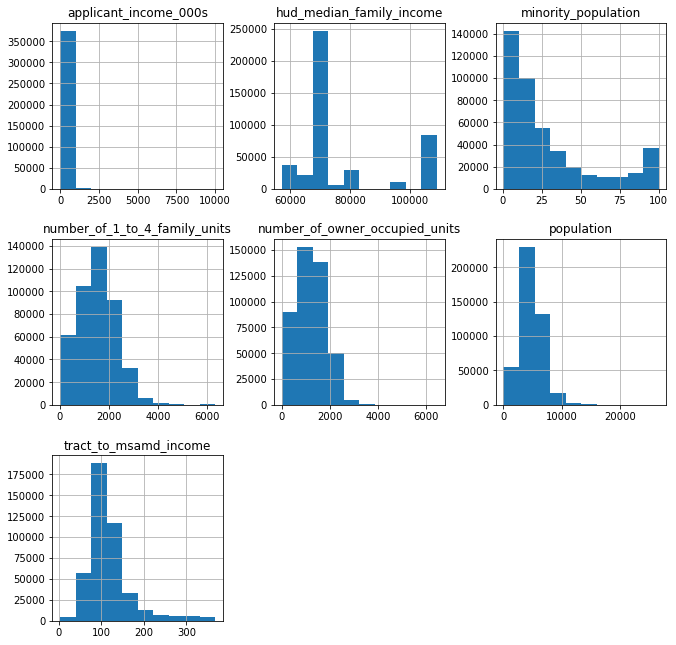

In [12]:
import matplotlib.pyplot as plt
#df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
#                        .index.values].hist(figsize=[11,11])

df[df.dtypes[(df.dtypes=="float64")].index.values].hist(figsize=[11,11])


As we see different features have different range, if we try to apply distance based methods such as kNN on these features, feature with the largest range will dominate the outcome results and we’ll obtain less accurate predictions. We can overcome this trouble using feature scaling. 

We can solve  this problem by scaling down all the features to a same range. sklearn provides a tool MinMaxScaler that will scale down all the features between 0 and 1. Mathematical formula for MinMaxScaler is.


$$X_{norm}=\frac{X-X_{min}}{X_{max}-X{min}}$$


In [29]:
#Decide which columns are to be scaled
scale_column = ['applicant_income_000s', 'hud_median_family_income', 'loan_amount_000s','number_of_1_to_4_family_units',
                'number_of_owner_occupied_units','minority_population','population','tract_to_msamd_income']
scale_column_indexer = ('applicant_income_000s', 'hud_median_family_income', 'loan_amount_000s','number_of_1_to_4_family_units',
                'number_of_owner_occupied_units','minority_population','population','tract_to_msamd_income')


#Drop rows whose scale_column contain missing data, NaN value, because the NaN will mess up the scaling
df_dropped = df.dropna(axis=0, how='any', subset=scale_column)

display(df_dropped.loc[0:20, :])

,action_taken,agency_code,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,hoepa_status,lien_status,loan_purpose,loan_type,...,preapproval,property_type,purchaser_type,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
0,1,9,2,97.0,5,2,2,1,1,1,...,3,1,0,109000.0,187,363.0,1817.0,21.139999,5870.0,109.459999
1,1,9,2,200.0,5,1,2,1,1,1,...,3,1,6,71300.0,460,53.0,256.0,45.959999,3512.0,160.600006
3,1,9,2,202.0,5,1,2,1,1,1,...,3,1,0,109000.0,770,1879.0,2147.0,7.350000,6642.0,165.830002
4,1,9,2,255.0,5,1,2,1,1,1,...,2,1,0,109000.0,648,835.0,676.0,30.059999,2339.0,133.300003
5,1,5,2,100.0,5,1,2,2,2,1,...,3,1,0,82700.0,40,3488.0,2002.0,6.130000,8977.0,110.220001
6,1,9,2,25.0,2,1,2,1,1,1,...,2,1,0,69000.0,57,1891.0,804.0,45.419998,4881.0,48.299999
7,1,9,2,13.0,3,2,2,1,1,1,...,2,1,0,69000.0,38,1686.0,519.0,97.900002,2757.0,42.660000
8,1,9,3,230.0,6,3,2,1,1,1,...,3,1,0,82700.0,159,2414.0,2077.0,14.770000,7442.0,138.440002
9,1,9,3,114.0,6,3,2,1,1,1,...,2,1,8,109000.0,302,363.0,1817.0,21.139999,5870.0,109.459999
10,1,7,2,89.0,5,1,2,1,1,1,...,2,1,3,71300.0,135,251.0,558.0,32.090000,1960.0,115.790001


In [30]:

def write_to_file(panda_df, file_name):
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    #writer = pd.ExcelWriter('file', engine='xlsxwriter')

    # Convert the dataframe to an XlsxWriter Excel object.
    #panda_df.to_excel(writer, sheet_name='Sheet1')

    # Close the Pandas Excel writer and output the Excel file.
    #writer.save()
    
    panda_df.to_csv(file_name, sep=',', encoding='utf-8', index=False)
    

In [31]:

# DO NOT run this cell if you want standaziation scale
from sklearn.preprocessing import minmax_scale
df_dropped.is_copy = False
df_dropped.loc[:, scale_column_indexer] = minmax_scale(df_dropped.loc[:, scale_column_indexer])


display(df_dropped.loc[0:20, :])

print(df_dropped.shape)
write_to_file(df_dropped, './data/ny_hmda_2015_minmax.csv')
#np_minmax = min_max.fit_transform(dr_dropped[scale_column])

#Note np_minmax is the numpy np array after fit_transform
#print(np_minmax[3000:3002:1][0:8:1])


,action_taken,agency_code,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,hoepa_status,lien_status,loan_purpose,loan_type,...,preapproval,property_type,purchaser_type,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
0,1,9,2,0.009602,5,2,2,1,1,1,...,3,1,0,1.000000,0.005314,0.056318,0.281308,0.208856,0.218366,0.281520
1,1,9,2,0.019904,5,1,2,1,1,1,...,3,1,6,0.272201,0.013115,0.007414,0.039368,0.458078,0.129405,0.423852
3,1,9,2,0.020104,5,1,2,1,1,1,...,3,1,0,1.000000,0.021972,0.295472,0.332455,0.070389,0.247491,0.438408
4,1,9,2,0.025405,5,1,2,1,1,1,...,2,1,0,1.000000,0.018486,0.130778,0.104464,0.298424,0.085151,0.347871
5,1,5,2,0.009902,5,1,2,2,2,1,...,3,1,0,0.492278,0.001114,0.549298,0.309981,0.058138,0.335584,0.283635
6,1,9,2,0.002400,2,1,2,1,1,1,...,2,1,0,0.227799,0.001600,0.297366,0.124303,0.452656,0.181053,0.111300
7,1,9,2,0.001200,3,2,2,1,1,1,...,2,1,0,0.227799,0.001057,0.265026,0.080130,0.979616,0.100921,0.095603
8,1,9,3,0.022905,6,3,2,1,1,1,...,3,1,0,0.492278,0.004514,0.379871,0.321606,0.144894,0.277673,0.362176
9,1,9,3,0.011302,6,3,2,1,1,1,...,2,1,8,1.000000,0.008600,0.056318,0.281308,0.208856,0.218366,0.281520
10,1,7,2,0.008802,5,1,2,1,1,1,...,2,1,3,0.272201,0.003829,0.038650,0.086175,0.318807,0.070852,0.299137


(376516, 21)


## Feature Standardization
Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean. Standard scores (also called z scores) of the samples are calculated as follows : 

$$Z=\frac{x-μ}{σ}$$

Elements such as l1 ,l2 regularizer in linear models (logistic comes under this category) and RBF kernel in SVM in objective function of learners assumes that all the features are centered around zero and have variance in the same order. Features having larger order of variance would dominate on the objective function as it happened in the previous section with the feature having large range.

Standardizing the data when using a estimator having l1 or l2 regularization helps us to increase the accuracy of the prediction model. Other learners like kNN with euclidean distance measure, k-means, SVM, perceptron, neural networks, linear discriminant analysis, principal component analysis may perform better with standardized data.

In [16]:
#from sklearn_pandas import DataFrameMapper

#mapper = DataFrameMapper([(df.columns, StandardScaler())])
#scaled_features = mapper.fit_transform(df.copy(), 4)
#scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)


In [27]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(data=scaler.fit_transform(df_dropped[scale_column]), 
                           columns=scale_column)

df = pd.concat([df_dropped, scaled_data], axis=1)
display(df.head(n=20))
write_to_file(df_dropped, './data/ny_hmda_2015_standar.csv')

,action_taken,agency_code,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,hoepa_status,lien_status,loan_purpose,loan_type,...,population,tract_to_msamd_income,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
0,1.0,9.0,2.0,97.0,5.0,2.0,2.0,1.0,1.0,1.0,...,5870.0,109.459999,-0.161157,1.895449,-0.244121,-1.464694,0.970563,-0.243778,0.591676,-0.181027
1,1.0,9.0,2.0,200.0,5.0,1.0,2.0,1.0,1.0,1.0,...,3512.0,160.600006,0.224249,-0.421859,0.433151,-1.855581,-1.612015,0.638715,-0.661732,0.779266
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.231733,1.895449,1.202214,0.446873,1.516528,-0.734091,1.002037,0.877474
3,1.0,9.0,2.0,202.0,5.0,1.0,2.0,1.0,1.0,1.0,...,6642.0,165.830002,0.430049,1.895449,0.899551,-0.869535,-0.917151,0.073379,-1.285246,0.266634
4,1.0,9.0,2.0,255.0,5.0,1.0,2.0,1.0,1.0,1.0,...,2339.0,133.300003,-0.149932,0.278866,-0.608806,2.475707,1.276634,-0.777469,2.243219,-0.166756
5,1.0,5.0,2.0,100.0,5.0,1.0,2.0,2.0,2.0,1.0,...,8977.0,110.220001,-0.430568,-0.563233,-0.566632,0.462004,-0.705383,0.619515,0.065968,-1.329473
6,1.0,9.0,2.0,25.0,2.0,1.0,2.0,1.0,1.0,1.0,...,4881.0,48.299999,-0.475470,-0.563233,-0.613768,0.203514,-1.176898,2.485480,-1.063056,-1.435379
7,1.0,9.0,2.0,13.0,3.0,2.0,2.0,1.0,1.0,1.0,...,2757.0,42.660000,0.336503,0.278866,-0.313585,1.121470,1.400717,-0.470268,1.427281,0.363152
8,1.0,9.0,3.0,230.0,6.0,3.0,2.0,1.0,1.0,1.0,...,7442.0,138.440002,-0.097547,1.895449,0.041177,-1.464694,0.970563,-0.243778,0.591676,-0.181027
9,1.0,9.0,3.0,114.0,6.0,3.0,2.0,1.0,1.0,1.0,...,5870.0,109.459999,-0.191092,-0.421859,-0.373125,-1.605917,-1.112375,0.145557,-1.486706,-0.062164


## Label Encoding

categorical features have string values, such as "Gender" has values of "male"m "female".  These features have to be converted into numeric values. Sklearn probides LabelEncoder to encode string labels with values between 0 and n_classes-1.  We do not need to encode because out dataset already contains categorical features in numeric columns.

The following is an example in case encoding is needed for other dataset:

    # Importing LabelEncoder and initializing it
    >> from sklearn.preprocessing import LabelEncoder
    >> le=LabelEncoder()
    # Iterating over all the common columns in train and test
    >> for col in X_test.columns.values:
           # Encoding only categorical variables
           if X_test[col].dtypes=='object':
           # Using whole data to form an exhaustive list of levels
           data=X_train[col].append(X_test[col])
           le.fit(data.values)
           X_train[col]=le.transform(X_train[col])
           X_test[col]=le.transform(X_test[col])
           

## One-Hot Encoding

One-Hot Encoding transforms each categorical feature with n possible values into n binary features, with only one active.

    Encode categorical integer features using a one-hot aka one-of-K scheme.
    The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features.
    The output will be a sparse matrix where each column corresponds to one possible value of one feature.
    It is assumed that input features take on values in the range [0, n_values).
    This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.



May use sklearn for numpy nparray, or panda for panda dataframe

    # import preprocessing from sklearn
    from sklearn import preprocessing

    # 1. INSTANTIATE
    enc = preprocessing.OneHotEncoder()

    # 2. FIT
    enc.fit(X_2)

    # 3. Transform
    onehotlabels = enc.transform(X_2).toarray()
    onehotlabels.shape

    # as you can see, you've the same number of rows 891
    # but now you've so many more columns due to how we changed all the categorical data into numerical data


In [32]:
one_hot_column = ['agency_code','applicant_ethnicity','applicant_race_1', 'applicant_sex']

df = pd.get_dummies(data=df, columns=one_hot_column)
display(df.head(n=2))
write_to_file(df_dropped, './data/ny_hmda_2015_onehot.csv')

,action_taken,applicant_income_000s,hoepa_status,lien_status,loan_purpose,loan_type,owner_occupancy,preapproval,property_type,purchaser_type,...,applicant_race_1_2,applicant_race_1_3,applicant_race_1_4,applicant_race_1_5,applicant_race_1_6,applicant_race_1_7,applicant_sex_1,applicant_sex_2,applicant_sex_3,applicant_sex_4
0,1,97.0,2,1,1,1,1,3,1,0,...,0,0,0,1,0,0,0,1,0,0
1,1,200.0,2,1,1,1,1,3,1,6,...,0,0,0,1,0,0,1,0,0,0


## Drop Rows with NA Value

In [33]:
#df_clean = df[~np.isnan(df).any(axis=1)]   ##only ~8k rows remain here
#df_onlyIncome_clean = df[~np.isnan(df['applicant_income_000s'])]  ## ~380k rows here
#pd.get_dummies(data=df_income_clean, columns=one_hot_column)

## Write Data To cPickle(Optional)

In [ ]:
#cPickle.dump(df, open('data/cleanData.p', 'wb'))

In [34]:
df_onehot = pd.read_csv('./data/ny_hmda_2015_onehot.csv', low_memory=False, header=0, delimiter=",")
display(df_onehot.head(n=2))

num_rows = df_onehot.shape[0]
num_col = df_onehot.shape[1]
print ("Total number of one-hot encoded records: {}".format(num_rows))
print ("Toatl numver of one-hot encoded features: {}".format(num_col))


,action_taken,agency_code,applicant_ethnicity,applicant_income_000s,applicant_race_1,applicant_sex,hoepa_status,lien_status,loan_purpose,loan_type,...,preapproval,property_type,purchaser_type,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
0,1,9,2,0.009602,5,2,2,1,1,1,...,3,1,0,1.000000,0.005314,0.056318,0.281308,0.208856,0.218366,0.281520
1,1,9,2,0.019904,5,1,2,1,1,1,...,3,1,6,0.272201,0.013115,0.007414,0.039368,0.458078,0.129405,0.423852


Total number of one-hot encoded records: 376516
Toatl numver of one-hot encoded features: 21


In [35]:
df_clean = df_onehot[~np.isnan(df_onehot).any(axis=1)]
print(df_clean.shape)

(376516, 21)


In [36]:
df_action_count = get_count_of_unique_columns(df_clean, ['action_taken','action_taken_name'])
print("df_action_count")
display(df_action_count)

KeyError: "['action_taken_name'] not in index"